## Algorithm training, testing, and validation

In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set() # Revert to matplotlib defaults
plt.rcParams['figure.figsize'] = (16, 12)

In [2]:
# load clean dataset
cleaned_df= pd.read_csv('D:/ML OPS/Assignment#4/Data/Cleaned/Cleaned_zambia_Solcast.csv')
cleaned_df.head()

,Unnamed: 0,MonthPE,Date,Daily_Temp,Daily_Precip,Daily_Humidity,Daily_Pressure,Daily_WindDir,Daily_WindSpeed,Daily_DNI,Daily_DHI,Daily_radiation
0,2018-12-31,12,2018-12-31,25.028571,37.557143,73.857143,917.542857,46.714286,3.250000,73.142857,312.071429,374.214286
1,2019-01-01,1,2019-01-01,26.142857,34.742857,65.000000,917.792857,55.142857,3.507143,635.714286,116.285714,580.785714
2,2019-01-02,1,2019-01-02,27.142857,37.342857,62.857143,916.585714,45.714286,1.878571,495.071429,191.642857,538.285714
3,2019-01-03,1,2019-01-03,26.435714,42.228571,66.357143,915.592857,158.428571,1.514286,93.714286,285.285714,331.714286
4,2019-01-04,1,2019-01-04,23.814286,44.450000,83.571429,916.250000,136.785714,0.971429,67.571429,306.142857,337.357143


In [3]:
# display column names
cleaned_df.columns

Index(['Unnamed: 0', 'MonthPE', 'Date', 'Daily_Temp', 'Daily_Precip',
       'Daily_Humidity', 'Daily_Pressure', 'Daily_WindDir', 'Daily_WindSpeed',
       'Daily_DNI', 'Daily_DHI', 'Daily_radiation'],
      dtype='object')

In [4]:
# select features
cleaned_df= cleaned_df[['MonthPE', 'Date', 'Daily_Temp', 'Daily_Precip', 'Daily_Humidity', 'Daily_Pressure',\
                        'Daily_WindDir', 'Daily_WindSpeed', 'Daily_DNI', 'Daily_DHI', 'Daily_radiation']]

In [5]:
# Feature Engineering of Time Series Column
cleaned_df['Date'] = pd.to_datetime(cleaned_df['Date'], format='%Y-%m-%d')
cleaned_df['year'] = cleaned_df['Date'].dt.year
cleaned_df['month'] = cleaned_df['Date'].dt.month
cleaned_df['day'] = cleaned_df['Date'].dt.day

In [6]:
# display column names
cleaned_df.columns

Index(['MonthPE', 'Date', 'Daily_Temp', 'Daily_Precip', 'Daily_Humidity',
       'Daily_Pressure', 'Daily_WindDir', 'Daily_WindSpeed', 'Daily_DNI',
       'Daily_DHI', 'Daily_radiation', 'year', 'month', 'day'],
      dtype='object')

In [7]:
# select features
cleaned_df = cleaned_df[['month', 'day', 'Daily_Temp', 'Daily_Precip', 'Daily_Humidity',
       'Daily_Pressure', 'Daily_WindDir', 'Daily_WindSpeed', 'Daily_DNI',
       'Daily_DHI', 'Daily_radiation']]
cleaned_df.head(35)

,month,day,Daily_Temp,Daily_Precip,Daily_Humidity,Daily_Pressure,Daily_WindDir,Daily_WindSpeed,Daily_DNI,Daily_DHI,Daily_radiation
0,12,31,25.028571,37.557143,73.857143,917.542857,46.714286,3.250000,73.142857,312.071429,374.214286
1,1,1,26.142857,34.742857,65.000000,917.792857,55.142857,3.507143,635.714286,116.285714,580.785714
2,1,2,27.142857,37.342857,62.857143,916.585714,45.714286,1.878571,495.071429,191.642857,538.285714
3,1,3,26.435714,42.228571,66.357143,915.592857,158.428571,1.514286,93.714286,285.285714,331.714286
4,1,4,23.814286,44.450000,83.571429,916.250000,136.785714,0.971429,67.571429,306.142857,337.357143
5,1,5,24.585714,47.821429,77.714286,915.607143,288.142857,1.764286,50.500000,221.714286,266.428571
6,1,6,25.135714,40.371429,76.714286,914.392857,267.285714,1.000000,102.642857,291.214286,387.785714
7,1,7,25.614286,38.935714,77.357143,913.378571,132.285714,1.064286,390.928571,185.285714,517.428571
8,1,8,25.828571,41.192857,72.285714,912.850000,260.928571,1.914286,81.642857,206.214286,264.500000
9,1,9,25.928571,45.128571,75.642857,913.364286,323.928571,1.692857,178.571429,245.142857,403.714286


### Model training and testing

In [8]:
# import libraries for algorithms traininng, and metrics to judge performance
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [9]:
# produces a 70%, 15%, 15% split for training, validation and test sets
train_data, validation_data, test_data = np.split(cleaned_df.sample(frac = 1),[int(.7 * len(cleaned_df)), int(.85 * len(cleaned_df))])

# convert dataframes to .csv and save it locally
train_data.to_csv('D:/ML OPS/Assignment#4/Data/Cleaned/train_data.csv', header=True, index=False)
validation_data.to_csv('D:/ML OPS/Assignment#4/Data/Cleaned/validation_data.csv', header=True, index = False)
test_data.to_csv('D:/ML OPS/Assignment#4/Data/Cleaned/test_data.csv', header = True, index = False)

In [10]:
# training data
train_df = pd.read_csv('D:/ML OPS/Assignment#4/Data/Cleaned/train_data.csv')
X_train = train_df.drop(['Daily_radiation'], axis = 1)
y_train = train_df['Daily_radiation']

# test data
test_df = pd.read_csv('D:/ML OPS/Assignment#4/Data/Cleaned/test_data.csv')
X_test = test_df.drop(['Daily_radiation'], axis = 1)
y_test = test_df['Daily_radiation']

### Linear Regression

In [11]:
# Setup the pipeline steps for linear regression
steps = [
    ('scaler', StandardScaler()),
    ('lr', LinearRegression())
]

# Create the pipeline
pipeline_lr = Pipeline(steps)

# Fit the pipeline to the train set
pipeline_lr.fit(X_train, y_train)

# Predict the labels of the test set
y_pred_lr = pipeline_lr.predict(X_test)

In [12]:
# Evaluating algorithm performance
mse = mean_squared_error(y_test, y_pred_lr, squared = False)
print('r2_score: ', r2_score(y_test, y_pred_lr))
print('Mean Squared Error: %.2f' % (mse))

r2_score:  0.9369710212407494
Mean Squared Error: 22.26


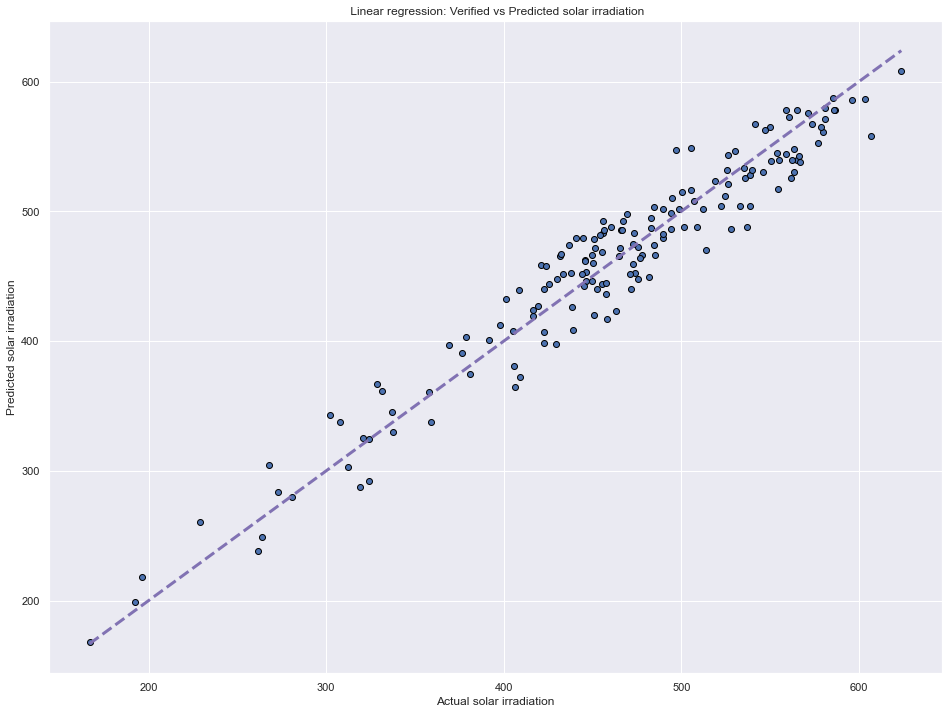

In [13]:
# Run the model against the test data presented through a plot
fig, pX = plt.subplots()

pX.scatter(y_test, y_pred_lr, edgecolors = (0, 0, 0))
pX.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'm--', lw = 3)
pX.set_xlabel('Actual solar irradiation')
pX.set_ylabel('Predicted solar irradiation')
pX.set_title(" Linear regression: Verified vs Predicted solar irradiation")
plt.show() 

C:\Users\NAGATEJA CHOWDARY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


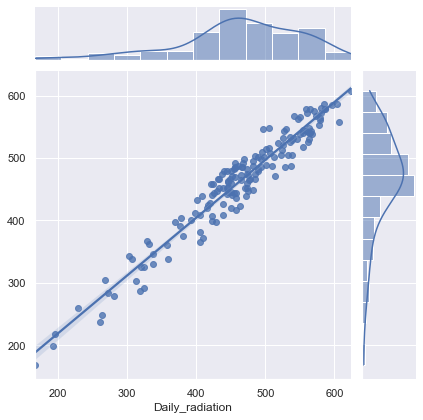

In [14]:
sns.jointplot(y_test, y_pred_lr, kind = 'reg')
plt.show()

### Random Forest Regressor

In [15]:
# Setup the random forest model: rft
rfr = RandomForestRegressor()

# Fit the pipeline to the train set
rfr.fit(X_train, y_train)

# Predict the labels of the test set
y_pred_rfr = rfr.predict(X_test)

In [16]:
# Evaluating algorithm performance
mse_rf = mean_squared_error(y_test, y_pred_rfr, squared = False)
print('r2_score: ', r2_score(y_test, y_pred_rfr))
print('Mean Squared Error: %.2f' % (mse_rf))

r2_score:  0.9664073573541386
Mean Squared Error: 16.25


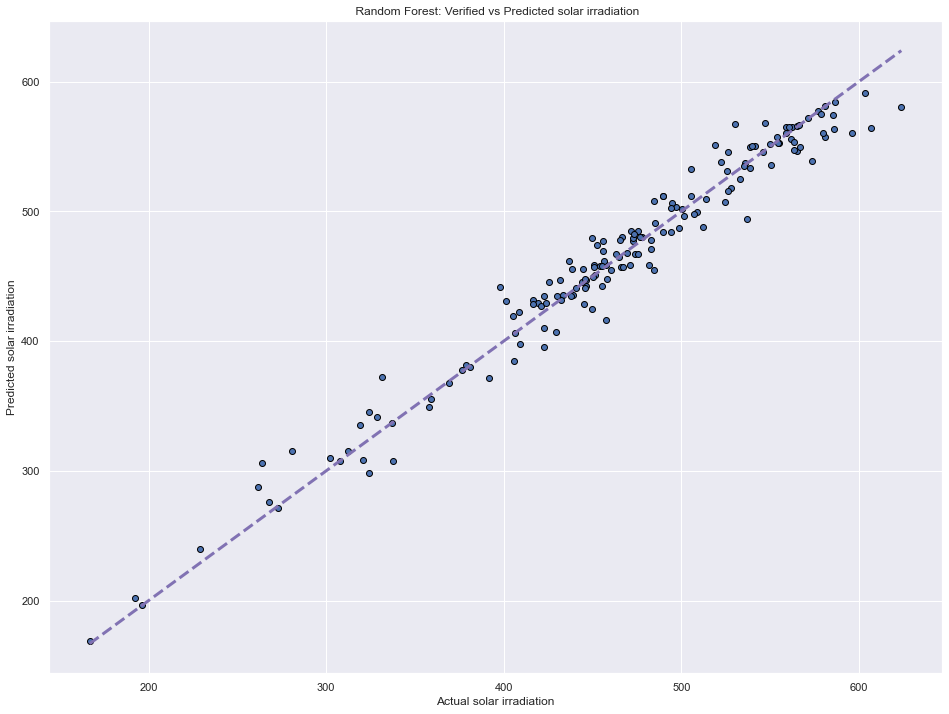

In [17]:
# Run the model against the test data presented through a plot
fig, pX = plt.subplots()

pX.scatter(y_test, y_pred_rfr, edgecolors = (0, 0, 0))
pX.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'm--', lw = 3)
pX.set_xlabel('Actual solar irradiation')
pX.set_ylabel('Predicted solar irradiation')
pX.set_title(" Random Forest: Verified vs Predicted solar irradiation")
plt.show()

C:\Users\NAGATEJA CHOWDARY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


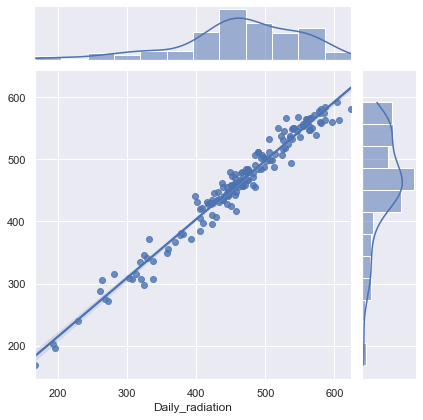

In [18]:
sns.jointplot(y_test, y_pred_rfr, kind = 'reg')
plt.show()

### GradientBoosting Regressor

In [19]:
# Setup the gradient boosting model: gbr
gbr = GradientBoostingRegressor()

# Fit the pipeline to the train set
gbr.fit(X_train, y_train)

# Predict the labels of the test set
y_pred_gbr = gbr.predict(X_test)

In [20]:
# Evaluating algorithm performance
mse_gr = mean_squared_error(y_test, y_pred_gbr, squared = False)
print('r2_score: ', r2_score(y_test, y_pred_gbr))
print('Mean Squared Error: %.2f' % (mse_gr))

r2_score:  0.9702139303023788
Mean Squared Error: 15.30


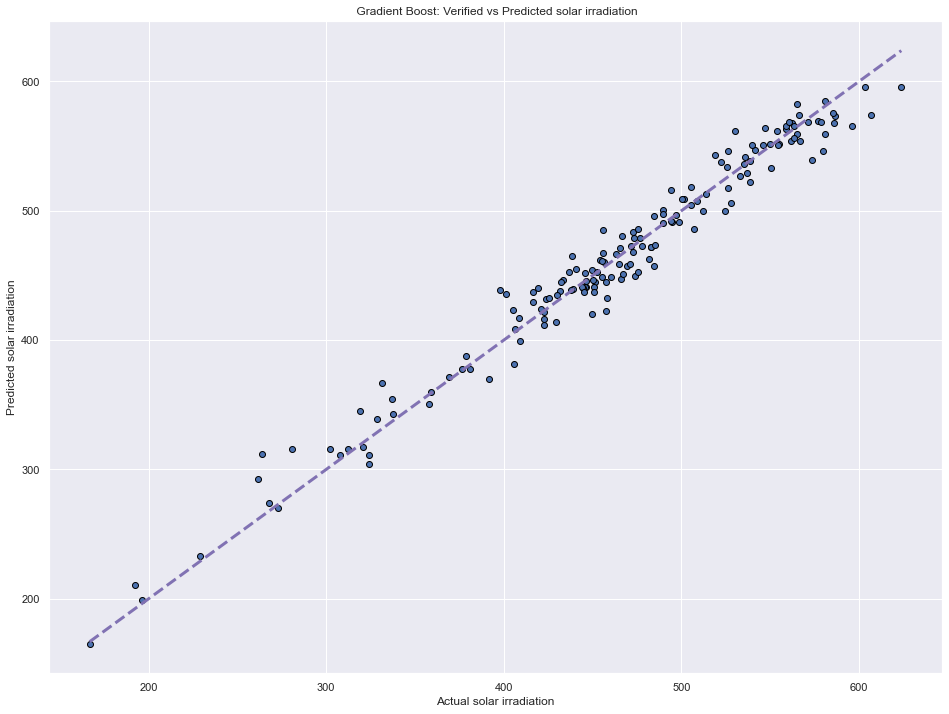

In [21]:
# Run the model against the test data presented through a plot
fig, pX = plt.subplots()

pX.scatter(y_test, y_pred_gbr, edgecolors = (0, 0, 0))
pX.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'm--', lw = 3)
pX.set_xlabel('Actual solar irradiation')
pX.set_ylabel('Predicted solar irradiation')
pX.set_title(" Gradient Boost: Verified vs Predicted solar irradiation")
plt.show()

C:\Users\NAGATEJA CHOWDARY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


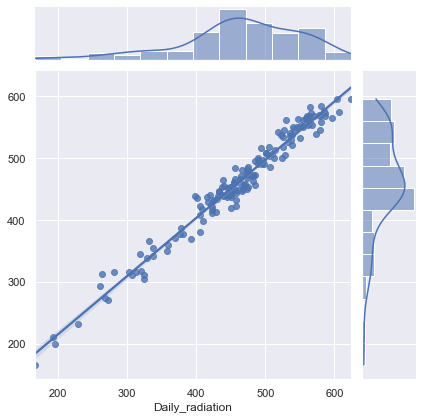

In [22]:
sns.jointplot(y_test, y_pred_gbr, kind = 'reg')
plt.show()

### Model Validation

In [23]:
# validation data
val_df = pd.read_csv('D:/ML OPS/Assignment#4/Data/Cleaned/validation_data.csv')
X_val = val_df.drop(['Daily_radiation'], axis=1)
y_val = val_df['Daily_radiation']

In [24]:
# validate models
y_val_lr = pipeline_lr.predict(X_val)
y_val_rfr = rfr.predict(X_val)
y_val_gbr = gbr.predict(X_val)

In [25]:
# Evaluating algorithm performance for linear regression
mse_lr_val = mean_squared_error(y_val, y_val_lr, squared = False)

mae_lr_val = mean_absolute_error(y_val, y_val_lr)

print('r2_score: ', r2_score(y_val, y_val_lr))

print('Linear Regression - Root Mean Squared Error: %.2f' % np.sqrt(mse_lr_val))

print('Linear Regression - Root Mean Absolute Error: %.2f' %np.sqrt (mae_lr_val))

r2_score:  0.9518405717069152
Linear Regression - Root Mean Squared Error: 4.61
Linear Regression - Root Mean Absolute Error: 4.12


In [26]:
# Evaluating algorithm performance for random forest regression
mse_rf_val = mean_squared_error(y_val, y_val_rfr, squared = False)

mae_rf_val = mean_absolute_error(y_val, y_val_lr)

print('r2_score: ', r2_score(y_val, y_val_rfr))

print('Random Forest -Root Mean Squared Error: %.2f' % np.sqrt(mse_rf_val))

print('Random Forest -Root Mean Absolute Error: %.2f' % np.sqrt(mae_rf_val))

r2_score:  0.9734777030237289
Random Forest -Root Mean Squared Error: 3.98
Random Forest -Root Mean Absolute Error: 4.12


In [27]:
# Evaluating algorithm performance for gradient boost regression
mse_gbr_val = mean_squared_error(y_val, y_val_gbr, squared = False)

mae_gbr_val = mean_absolute_error(y_val, y_val_gbr)

print('r2_score: ', r2_score(y_val, y_val_gbr))

print('Gradient Boost -Root Mean Squared Error: %.2f' % np.sqrt(mse_gbr_val))

print('Gradient Boost -Root Mean Squared Error: %.2f' % np.sqrt(mae_gbr_val))

r2_score:  0.974174687826147
Gradient Boost -Root Mean Squared Error: 3.95
Gradient Boost -Root Mean Squared Error: 3.48
